In [ ]:
# This data covers up to 2016
# In this spreadsheet we answer the following questions:
# 1- Who is the most successful director?
# 2- Who is the most famous lead actor?
# 3- Average film production in the last five years

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('movie_metadata.csv')

In [2]:
# first remove the unnecessary columns
df.drop(['color', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name'
        , 'genres', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords'
        , 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'actor_2_facebook_likes' 
        , 'aspect_ratio', 'movie_facebook_likes'], inplace=True, axis=1)
df

,director_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,budget,title_year,imdb_score
0,James Cameron,1000.0,760505847.0,CCH Pounder,Avatar,237000000.0,2009.0,7.9
1,Gore Verbinski,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,300000000.0,2007.0,7.1
2,Sam Mendes,11000.0,200074175.0,Christoph Waltz,Spectre,245000000.0,2015.0,6.8
3,Christopher Nolan,27000.0,448130642.0,Tom Hardy,The Dark Knight Rises,250000000.0,2012.0,8.5
4,Doug Walker,131.0,NaN,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1
...,...,...,...,...,...,...,...,...
5038,Scott Smith,637.0,NaN,Eric Mabius,Signed Sealed Delivered,NaN,2013.0,7.7
5039,NaN,841.0,NaN,Natalie Zea,The Following,NaN,NaN,7.5
5040,Benjamin Roberds,0.0,NaN,Eva Boehnke,A Plague So Pleasant,1400.0,2013.0,6.3
5041,Daniel Hsia,946.0,10443.0,Alan Ruck,Shanghai Calling,NaN,2012.0,6.3


In [3]:
# Second remove the null values
df.isna().sum()

director_name             104
actor_1_facebook_likes      7
gross                     884
actor_1_name                7
movie_title                 0
budget                    492
title_year                108
imdb_score                  0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isna().sum()

director_name             0
actor_1_facebook_likes    0
gross                     0
actor_1_name              0
movie_title               0
budget                    0
title_year                0
imdb_score                0
dtype: int64

In [5]:
# now remove duplicates
print(df.duplicated().sum())

100


In [6]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [7]:
# then convert wrong format
df.dtypes

director_name              object
actor_1_facebook_likes    float64
gross                     float64
actor_1_name               object
movie_title                object
budget                    float64
title_year                float64
imdb_score                float64
dtype: object

In [8]:
df['actor_1_facebook_likes'] = df['actor_1_facebook_likes'].astype(int)
df['title_year'] = df['title_year'].astype(int)
df['gross'] = df['gross'].astype(int)

In [9]:
# now let's solve the first question
director_df = df[['director_name', 'gross']].copy()
director_df = director_df.set_index('director_name')

In [10]:
new_df = pd.DataFrame([], columns=['director_name', 'gross'])

for i in director_df.index.unique():
    g = director_df.loc[i, 'gross'].sum()
    new_df.loc[len(new_df.index)] = [i, g] 

new_df = new_df.sort_values(by=['gross'], ascending=False)
new_df.head()

,director_name,gross
37,Steven Spielberg,4114233101
26,Michael Bay,2195443511
15,Peter Jackson,2112883917
0,James Cameron,1948125910
3,Christopher Nolan,1813227576


<AxesSubplot:xlabel='director_name', ylabel='gross'>

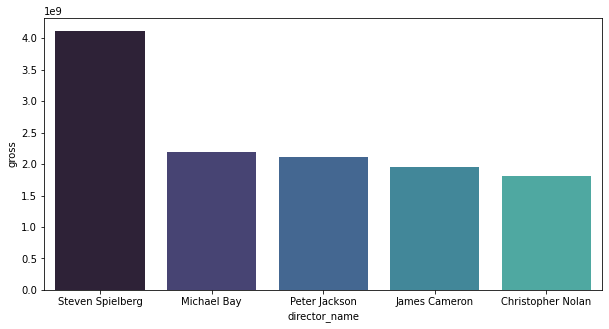

In [11]:
plt.figure(figsize=(10,5))
sns.set_palette("mako")
sns.barplot(data=new_df.head(5), x="director_name", y="gross")

In [12]:
# then Second question
lead_actor_df = df[['actor_1_name', 'actor_1_facebook_likes']]
# lead_actor_df['actor_1_name'].unique()
lead_actor_df = lead_actor_df.drop_duplicates()

lead_actor_df = lead_actor_df.sort_values(by=['actor_1_facebook_likes'], ascending=False)
lead_actor_df.head()

,actor_1_name,actor_1_facebook_likes
1902,Darcy Donavan,640000
4592,Matthew Ziff,260000
1223,Krista Allen,164000
2269,Andrew Fiscella,137000
74,Jimmy Bennett,87000


<AxesSubplot:xlabel='actor_1_facebook_likes', ylabel='actor_1_name'>

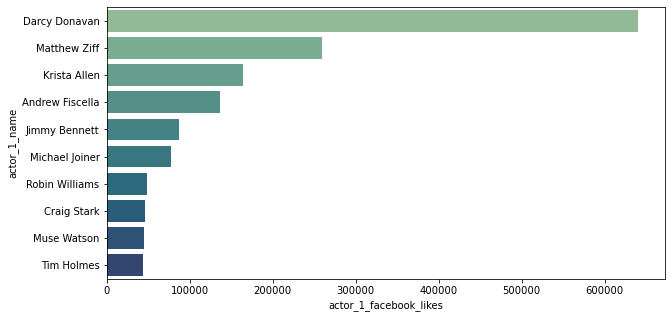

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data=lead_actor_df.head(10), x="actor_1_facebook_likes", y="actor_1_name", palette="crest")

In [59]:
# now third qustion
year_df = df[['title_year']]
year_df['count'] = year_df.groupby('title_year')['title_year'].transform('count')
year_df = year_df.drop_duplicates()
year_df = year_df.sort_values(by=['title_year'], ascending=False)
year_df.head(5)

C:\Users\Asus\AppData\Local\Temp/ipykernel_9228/4278891694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_df['count'] = year_df.groupby('title_year')['title_year'].transform('count')


,title_year,count
10,2016,64
2,2015,127
20,2014,151
14,2013,165
3,2012,159


<AxesSubplot:xlabel='title_year', ylabel='count'>

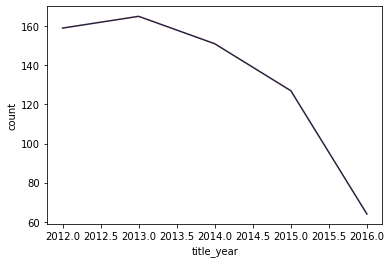

In [60]:
sns.lineplot(data=year_df.head(5), x="title_year", y="count")